# ***Analisis de compomente principales (PCA).***

## ***Universidad Central***

## ***Maestría en analítica de datos***

## ***Métodos estadísticos para analítica de datos.***
## ***Docente: Luis Andrés Campos Maldonado.***

## ***Apredizaje no supersivado.***

EL aprendizaje no supervisado se refiere a métodos estadísticos que extraen significado
a partir de datos sin entrenar un modelo con una variable target (resultado de interés). En el aprendizaje no supervisado se construye un modelo de los datos, pero sin distinguir entre una variable target y variables features.

El aprendizaje no supervisado se puede utilizar para:

1. Crear una regla predictiva en ausencia de una respuesta etiquetada. 

2. Se pueden utilizar para identificar grupos significativos de datos (cluster). 

3. Reducir la dimensión de los datos, de tal forma que con este conjunto reducido podría usarse como "nuevas" features en un modelo de predicción, tal como la regresión o la clasificación. 

Algunos ejemplo clásicos:

- Usando los clics en una página web y con datos demográficos de un usuario en un sitio web, podemos agrupar diferentes tipos de usuarios. El sitio web podría entonces personalizarse para estos diferentes tipos.

- Podemos tener miles de sensores para monitorear un proceso industrial. Al reducir los datos a un conjunto más pequeño de características, podemos ser capaces de construir un modelo más poderoso e interpretable para predecir la falla del proceso que podría construirse al incluir flujos de datos de miles de sensores.

 - Podríamos querer predecir el tipo de vegetación en un área de un conjunto de datos tomados satelitalmente. Como no tenemos variable target para entrenar un modelo, el agrupamiento nos brinda una forma de identificar patrones comunes y categorizar las regiones. La agrupación en clústeres es una herramienta especialmente importante para el "problema del arranque en frío". 

El aprendizaje no supervisado también es importante como elemento básico para técnicas de regresión y clasificación. Con grandes datos, si un pequeña
subpoblación no está bien representada en la población total, el modelo entrenado puede no funcionar bien para esa subpoblación. Con agrupamiento, es posible identificar y etiquetar subpoblaciones. Luego se pueden ajustar modelos separados a las diferentes subpoblaciones. Alternativamente, la subpoblación se puede representar con su propia característica,
obligando al modelo general a considerar explícitamente la subpoblación y su identidad como predictor.

Finalmente, el aprendizaje no supervisado puede verse como una extensión del análisis exploratorio de datos exploratorios a situaciones en las que se enfrenta a un gran número de features y registros. El objetivo es obtener información sobre un conjunto de datos y cómo las diferentes variables se relacionan entre sí. Las técnicas no supervisadas le permiten tamizar y analizar a través de estas variables y descubrir relaciones.

***Nota:***

Otra aplicación común para algoritmos no supervisados
se evidencia como un paso de preprocesamiento para algoritmos supervisados. Deducir una nueva representación de los datos a veces puede mejorar la precisión de los algoritmos supervisados, o pueden conducir a la reducción del consumo de memoria y tiempo.

## ***Análisis de componentes principales (PCA)***

El PCA es una transformaciones no supervisadas de un conjunto de datos, es decir, son algoritmos que crean una nueva representación de los datos que podría ser más fácil de entender para humanos y algoritmos de machine learning en comparación con la representación original de los datos. 

Acá, tenemos una representación de alta dimensión de los datos, que consta de muchas features, y deseamos encontrar una nueva forma de representar estos datos que resuma las características esenciales con
menos features. Deseamos por tanto, la reducción a pocas componentes con fines de visualización e interpretabilidad.

En resumen deseamos "comprimir los datos" y encontrar una representación que sea más informativa para su posterior procesamiento.


El análisis de componentes principales es un método que rota el conjunto de datos de tal manera que
las características rotadas no están correlacionadas estadísticamente. Esta rotación suele ir seguida de
la selección de solo un subconjunto de las "nuevas" features, de acuerdo con su importancia para la 
explicación los datos.

El siguiente ejemplo ilustra el efecto de PCA
en un conjunto de datos bidimensional:

In [2]:
%%capture
!pip install mglearn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
import mglearn
##
from sklearn.decomposition import PCA            ## Principal component analysis
from sklearn.preprocessing import StandardScaler ## Estandarizar datos
##
warnings.filterwarnings('ignore')

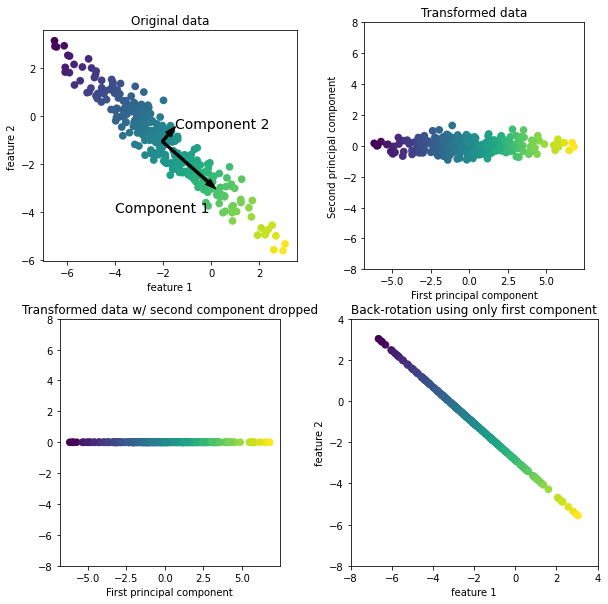

In [4]:
#plt.figure(figsize=(15,9))
mglearn.plots.plot_pca_illustration()

El primer gráfico (arriba a la izquierda) muestra los puntos de datos originales, coloreados para distinguir entre a ellos. El algoritmo procede encontrando primero la dirección de máxima varianza, etiquetado como "Component 1". Esta es la dirección (o vector) en los datos que contiene más información, o en otras palabras, la dirección a lo largo de la cual las características son más correlacionados entre sí. Entonces, el algoritmo encuentra la dirección que contiene la mayor parte de la información siendo ortogonal (en ángulo recto) a la primera dirección. En dos dimensiones, sólo hay una orientación posible que es en ángulo recto, pero en
espacios de dimensiones superiores habría muchas direcciones ortogonales.

Aunque los dos componentes se dibujan como flechas, en realidad no importa dónde esté la cabeza y la cola; podríamos haber dibujado la primera componente desde el centro hasta la parte superior izquierda en lugar de abajo a la parte inferior derecha. Las direcciones encontradas mediante este proceso se denominan componentes principales, ya que son las principales direcciones de varianza en el datos. En general, hay tantos componentes principales como features originales.

La segunda gráfica (arriba a la derecha) muestra los mismos datos, pero ahora girados para que la primera
componente principal se alinea con el eje $x$ y el segundo componente principal se alinea con el eje $y$. Antes de la rotación, se restó la media de los datos, por lo que los datos transformados se centran alrededor de cero. En la representación rotada encontrada por PCA, los dos ejes no están correlacionados, lo que significa que la matriz de correlación de los datos en esta representación son cero excepto en la diagonal. 

Podemos usar PCA para la reducción de dimensionalidad reteniendo solo algunos de los principales componentes En este ejemplo, podríamos mantener solo el primer componente principal, como se muestra en el tercer panel del plot (abajo a la izquierda). Esto reduce los datos de un conjunto de datos bidimensional a un conjunto de datos unidimensional. Tenga en cuenta, sin embargo, que en lugar de mantener solo una de las features originales, encontramos la dirección más interesante
(arriba a la izquierda a abajo a la derecha en el primer plot) y mantuvo esta dirección, es decir la primera componente principal.

Finalmente, podemos deshacer la rotación y volver a agregar la media a los datos. Esto resultará
en los datos que se muestran en el último subplot de la figura anterior. Estos puntos están en el espacio original, pero conservamos sólo la información contenida en el primer componente principal. PCA se utiliza a veces para eliminar los efectos de ruido de los datos o visualizar qué parte de la información se retiene utilizando los componentes principales.

### ***Idea central:***

Se tiene un conjunto de $p$ features cuantitativas y se quieren construir un numero de features $r\leq p$ con independencia lineal u ortogonales, que contengan la mayor cantidad de información del dataset.

## ***Comentarios previos:***

1. A menudo, las features variarán juntas, y parte de la variación en una está en realidad duplicada por la variación en otra. Esta técnica se usa para descubrir la forma en que las features numéricas covarían.

2. La idea en PCA es combinar múltiples features numéricas en un conjunto más pequeño de features, que son combinaciones lineales ponderadas del conjunto original. Este "pequeño" conjunto de features (las componentes principales), "explica" la mayor parte de la variabilidad del total de features originales, reduciendo la dimensión de los datos. 

3. Los pesos utilizados para formar las componentes principales revelan las contribuciones relativas de las features originales a las nuevas componentes principales.



## ***Términos clave para el análisis de componentes principales.***

- **Componente principal:** Una combinación lineal de las features originales.

- **Loading:** Los pesos que transforman las features originales en las componentes principales.

- **Gráfico de sedimentación:** Un plot de las varianzas de las componentes, que muestra la importancia relativa de las componentes, ya sea como varianza explicada o como proporción de la varianza explicada.

## ***Ejemplo introductorio:***

Para dos reatures, $X_1$ y $X_2$, hay dos componentes principales $Z_i (i= 1,2)$:

$$Z_{i}= w_{i,1}X_{1} + w{i,2}X_{2}$$

Los pesos $w_{i,1} + w_{i,2}$ se conocen como loading de las componentes. Estos transforman las
features originales en los componentes principales. El primer componente principal, $Z_1$, es la combinación lineal que mejor explica la variación total. El segundo componente, $Z_2$, es ortogonal a la primera y explica la mayor parte de la variabilidad restante. (Si hay más features cada componente adicional sigue la misma regla).

Nota: También es común calcular los componentes principales de las desviaciones de las medias de las variables predictoras, en lugar de los valores originales.

In [5]:
## Consideremos un dataframe como el siguiente
example = pd.DataFrame({"X1":[16,12,13,11,10,9,8,7,5,3,2,0],
                   "X2":[8,10,6,2,8,-1,4,6,-3,-1,-3,0]})
example

,X1,X2
0,16,8
1,12,10
2,13,6
3,11,2
4,10,8
5,9,-1
6,8,4
7,7,6
8,5,-3
9,3,-1


Este dataframe tiene 2 features y 12 registros.

In [6]:
## Consideremos la matriz de covarianza y de correlación lineal.
print("Matriz de covarianas:")
display(example.cov())
print("\n\nMatriz de correlación:")
example.corr()

Matriz de covarianas:


,X1,X2
X1,23.090909,16.454545
X2,16.454545,21.090909




Matriz de correlación:


,X1,X2
X1,1.00000,0.74562
X2,0.74562,1.00000


In [7]:
## Centramos los datos.
example["X1*"] = example['X1']-example["X1"].mean()
example["X2*"] = example["X2"]-example["X2"].mean()
example

,X1,X2,X1*,X2*
0,16,8,8.0,5.0
1,12,10,4.0,7.0
2,13,6,5.0,3.0
3,11,2,3.0,-1.0
4,10,8,2.0,5.0
5,9,-1,1.0,-4.0
6,8,4,0.0,1.0
7,7,6,-1.0,3.0
8,5,-3,-3.0,-6.0
9,3,-1,-5.0,-4.0


Note que la variabilidad total de los datos es:

$$23.091 + 21.091=44.182$$

Además:

In [8]:
print("La feature {} retiene el {:.4f}% de la variabilidad total.".format(example.columns[0],23.0909/44.182))
print("La feature {} retiene el {:.4f}% de la variabilidad total.".format(example.columns[1],21.0909/44.182))

La feature X1 retiene el 0.5226% de la variabilidad total.
La feature X2 retiene el 0.4774% de la variabilidad total.


In [10]:
## Un plot de los registros corregidos por la media
fig = px.scatter(data_frame=example, x="X1*",y="X2*", hover_name= example.index +1, title="")
fig.add_hline(y = 0,line_color = "pink")
fig.add_vline(x = 0,line_color = "pink")
fig.show()

Deseamos encontrar un nuevo eje que retenga la mayor cantidad de varianza. Para ello vamos a hacer uso de los eigenvalores y eigenvectores de la matriz de covarianzas de los datos corregidos por la media.

In [11]:
matrix = example[["X1*","X2*"]].cov()
eigenvalores, eigenvectores = np.linalg.eig(matrix)
#
eigenvalores # Valores propios de la matriz 

array([38.57581328,  5.6060049 ])

In [12]:
eigenvectores

array([[ 0.72823813, -0.68532417],
       [ 0.68532417,  0.72823813]])

In [13]:
eigenvectores[:,0] ## Eigenvector asociado al valor propio 38.57581328

array([0.72823813, 0.68532417])

Realizamos la operación:

$$Y_{1}=X*\Gamma_1$$

In [14]:
example[["X1*","X2*"]].values@eigenvectores[:,0]

array([ 9.25252593,  7.71022174,  5.69716318,  1.49939023,  4.88309713,
       -2.01305855,  0.68532417,  1.32773438, -6.29665943, -6.38248736,
       -8.48137383, -7.88187759])

El resultado obtenido en $Y_1$ será la primera componente principal.

In [18]:
example["Y1"] = example[["X1*","X2*"]].values@eigenvectores[:,0].round(4)
example

,X1,X2,X1*,X2*,Y1
0,16,8,8.0,5.0,9.2521
1,12,10,4.0,7.0,7.7099
2,13,6,5.0,3.0,5.6969
3,11,2,3.0,-1.0,1.4993
4,10,8,2.0,5.0,4.8829
5,9,-1,1.0,-4.0,-2.0130
6,8,4,0.0,1.0,0.6853
7,7,6,-1.0,3.0,1.3277
8,5,-3,-3.0,-6.0,-6.2964
9,3,-1,-5.0,-4.0,-6.3822


In [19]:
## Veamos las varianzas
example.var()

X1     23.090909
X2     21.090909
X1*    23.090909
X2*    21.090909
Y1     38.572393
dtype: float64

Notemos que la varianza para la nueva variable satisface que:

In [20]:
var = example.var().loc["Y1"]
print("La feature {} retiene el {:.3f}% de la variabilidad total.".format(example.columns[4], (var/44.182)*100))

La feature Y1 retiene el 87.303% de la variabilidad total.


Ahora, buscamos un nuevo eje $Y_2$ que sea ortogonal a $Y_1$ y que retenga la mayor variabilidad posible de los datos NO retenida por la primer componente principal. Para ello hacemos uso del hecho que eigenvectores asociados a eigenvalores propios distintos son ortogonales. Luego:

$$Y_2=X*\Gamma_2$$

donde $\Gamma_2$ es el segundo eigenvector asociado al segundo eigenvalor de la matriz de covarianzas. $Y_2$ será la segunda componente principal.

In [21]:
example["Y2"] = example[["X1*","X2*"]].values@eigenvectores[:,1].round(4)
example

,X1,X2,X1*,X2*,Y1,Y2
0,16,8,8.0,5.0,9.2521,-1.8414
1,12,10,4.0,7.0,7.7099,2.3562
2,13,6,5.0,3.0,5.6969,-1.2419
3,11,2,3.0,-1.0,1.4993,-2.7841
4,10,8,2.0,5.0,4.8829,2.2704
5,9,-1,1.0,-4.0,-2.0130,-3.5981
6,8,4,0.0,1.0,0.6853,0.7282
7,7,6,-1.0,3.0,1.3277,2.8699
8,5,-3,-3.0,-6.0,-6.2964,-2.3133
9,3,-1,-5.0,-4.0,-6.3822,0.5137


Observemos lo siguiente:

In [22]:
example[["Y1","Y2"]].corr()

,Y1,Y2
Y1,1.000000,-0.000019
Y2,-0.000019,1.000000


In [23]:
example[["Y1","Y2"]].var()

Y1    38.572393
Y2     5.605508
dtype: float64

In [24]:
example[["Y1","Y2"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Y1,12.0,7.401487e-17,6.210668,-8.4810,-6.317850,1.00650,5.08640,9.2521
Y2,12.0,1.110223e-16,2.367595,-3.5981,-1.959375,0.12815,2.29185,3.2978


De todo lo anterior podemos observar que:

1. Cada una de la nuevas features es una combinación lineal de las features originales y se conservan centradas.

2. La variabilidad total de las nuevas features ($38.576+5.606=44.182$) es la misma que la varibilidad total contenida en las features originales. Es decir, no hay perdida de información.

3. Los porcentajes de la variabilidad retenida por las componentes principales $Y_1$ y $Y_2$ son, respectuvamente, $87.31\%$ y $12.69\%$. La variana reunida por la primera componente principal es mayor que cualquiera de las features originales.

4. Las componentes principales son incorrelacionadas, es decir, su correlación es cero.

In [25]:
fig = px.scatter(data_frame=example, x="X1*",y="X2*", hover_name= example.index +1, 
                 title="Componetes Principales")
fig.add_hline(y = 0,line_color = "pink")
fig.add_vline(x = 0,line_color = "pink")
fig.add_trace(go.Scatter(x = [-8,8], y = [-8.5,8.5],name = r"$Y_1$",line=dict(color="orange"),))
fig.add_trace(go.Scatter(x = [-8,8], y = [7.52,-7.52],name = r"$Y_2$",line=dict(color="orange"),))
fig.update_layout(autosize=False,width=400,height=400,)
fig.show()

## ***Ejemplo 1.***

Vamos a considerar en este primer ejemplo el dataframe `Global_Carbon_Budget_2018.csv`. Vamos a importarlo:

In [26]:
url_base = "https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/"
df_name = "Global_Carbon_Budget_2018.csv"
df = pd.read_csv(url_base + df_name, sep=";", decimal=",", index_col = "Year")
df.head()

,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink,budget imbalance
Year,,,,,,
1750,NaN,NaN,-0.08,NaN,0.09,NaN
1751,0.0,NaN,-0.07,NaN,-0.53,NaN
1752,0.0,NaN,-0.07,NaN,-0.27,NaN
1753,0.0,NaN,-0.07,NaN,-0.17,NaN
1754,0.0,NaN,-0.06,NaN,-0.33,NaN


<center>

|feature|Traducción|
|:---|---:|
|fossil fuel and industry|Combustible fósil e industría|
|land-use change emissions|emisiones de cambio de uso de la tierra|
|atmospheric growth|crecimiento atmosférico|
|ocean sink|sumidero del oceano|
|land sink|sumidero de tierra|
|budget imbalance|desequilibrio presupuestario|

</center>


In [27]:
## Información del DataFrame.
print("Tamaño de la data:",df.shape,"\n\nValor nulos por feature:\n")
df.isna().sum()

Tamaño de la data: (268, 6) 

Valor nulos por feature:



fossil fuel and industry       1
land-use change emissions    100
atmospheric growth            13
ocean sink                    38
land sink                      0
budget imbalance             113
dtype: int64

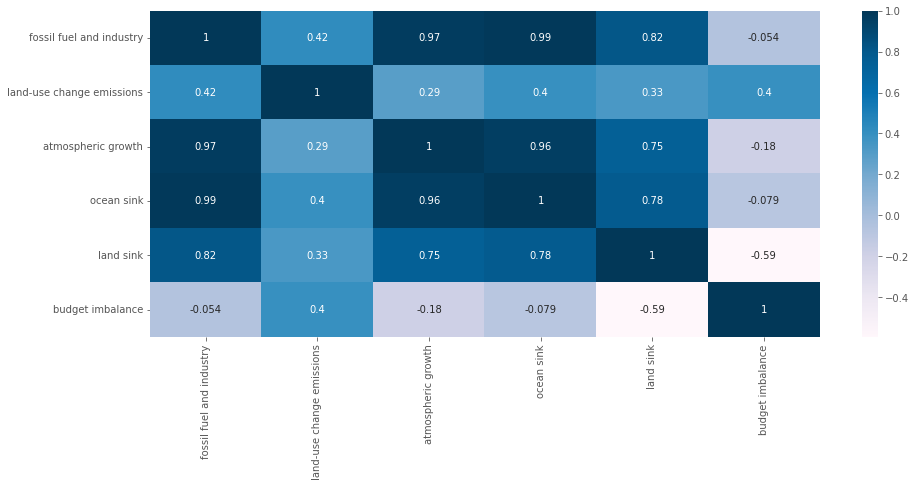

In [28]:
## Primero observemos la matriz de correlaciones lineales
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('ggplot')
sns.heatmap(df.corr(), annot=True, cmap="PuBu")
plt.show()

In [29]:
fig = px.scatter(df, x="fossil fuel and industry", y="ocean sink", trendline='ols', 
                 trendline_color_override='red')
fig.show()

In [30]:
fig = px.scatter(df, x="fossil fuel and industry", y="land sink", trendline = "ols", 
                 trendline_color_override = "red")
fig.show()

In [31]:
fig = px.scatter(df, x="ocean sink", y="land sink", trendline = "ols", trendline_color_override = "red")
fig.show()

Observamos que las tres variables anteriores revisten información altamente correlacionada.

## ***Construcción de un [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)***

En primera instancia debemos eliminar los registros con datos faltantes, siguido debemos escalar la información, deberemos la nueva información escalda.

In [32]:
df_pca = df.dropna()                # Debemos trabajar con datos no nulos.
scaler = StandardScaler()           # Cargando el escalador estandar
scaler.fit(df_pca)                  # Calcula las medias y las desviaciones
X_scaled = scaler.transform(df_pca) # Estandariza la data.
pd.DataFrame(X_scaled, index = df_pca.index, columns = df_pca.columns)

,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink,budget imbalance
Year,,,,,,
1850,-0.894207,-1.674175,-0.916270,-1.108640,-0.488486,-0.379313
1851,-0.894207,-1.674175,-0.970463,-1.092207,-1.120719,0.421450
1852,-0.889621,-1.640192,-1.024656,-1.092207,-0.804603,0.146188
1853,-0.889621,-1.640192,-1.078849,-1.092207,-1.011714,0.458986
1854,-0.885034,-1.640192,-1.124010,-1.092207,-0.902708,0.408938
...,...,...,...,...,...,...
2000,2.155773,0.466778,2.028218,2.358708,3.250409,-2.281126
2001,2.229156,-0.008989,2.037250,2.358708,1.528119,-0.291730
2002,2.275020,0.534745,2.046282,2.457306,-0.106966,1.822786


In [33]:
# Instanciamos un objeto PCA y determinamos el número de componentes principales que deseamos.
pca = PCA(n_components=2)           # Otra opcion pca = PCA(n_components = 0.85).
pca.fit(X_scaled)                   # Ajuste ese PCA a los datos estandarizados.
pca_array = pca.transform(X_scaled) # Convertimos nuestros datos con las nuevas dimensiones de PCA 
                                    # (calcula las nuevas variables).

In [34]:
## Cantidad de varianza retenida por las 2 primeras componentes principales.
ratio = np.sum(pca.explained_variance_ratio_)
print(f"\nLa cantidad de variabilidad retenida por las 2 primeras componentes es {ratio*100:.3f}%")


La cantidad de variabilidad retenida por las 2 primeras componentes es 88.339%


## ***Ejemplo 2.***

Vamos a considerar el dataframe `Delitos_Colombia.csv` que contiene el número de delitos por departamento, en distintas categorías. Toda la información es numérica.

In [35]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('ggplot')
url_base = "https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/"
df_name2 = "Delitos_Colombia.csv"
df2 = pd.read_csv(url_base + df_name2, sep=";", decimal=",", index_col=0)
df2.head()

,Delitos_Sexuales,Homicidios,Transito,Asalto,Intrafamiliar,Poblacion
Departamento,,,,,,
Antioquia,2163,375,5079,11897,8205,6690977
Atlantico,1042,85,1928,59,3659,2546138
Bogota_D.C.,4211,1463,725,2725,19811,8181047
Bolivar,944,28,922,3812,2085,2171558
Boyaca,517,95,1167,4084,2707,1281979


In [36]:
# Seleccionamos las cuantitativas (ACP solo trabaja con cuantitativas). Cuando sea el caso seleccionamos 
# así: -----> cuanti = df2.select_dtypes(np.number)

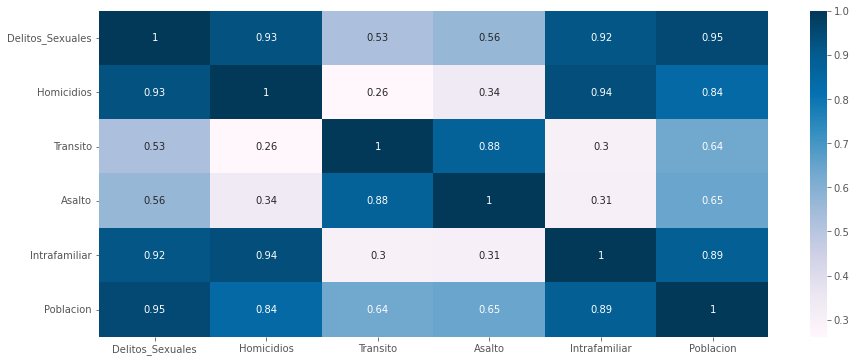

In [37]:
sns.heatmap(df2.corr(), annot = True, cmap = "PuBu")
plt.show()

Para realizar un mejor análisis vamos considerar la siguiente tasa (para todas las variables):

$$Tasa Delitos Sexuales=100.000\times \frac{Delitos Sexuales}{Poblacion}$$

la cual representa la incidencia por cada $100.000$ habitantes.

In [38]:
df2["DSex_P"] = 100000*df2["Delitos_Sexuales"]/df2["Poblacion"]
df2["DHom_p"] = 100000*df2["Homicidios"]/df2["Poblacion"]
df2["DIntra_p"] = 100000*df2["Intrafamiliar"]/df2["Poblacion"]
df2["DTransi_p"] = 100000*df2["Transito"]/df2["Poblacion"]
df2["DAsal_p"] = 100000*df2["Asalto"]/df2["Poblacion"]
df2 = df2[["DSex_P", "DHom_p", "DIntra_p", "DTransi_p", "DAsal_p"]]
df2

,DSex_P,DHom_p,DIntra_p,DTransi_p,DAsal_p
Departamento,,,,,
Antioquia,32.327118,5.604563,122.627831,75.908197,177.806619
Atlantico,40.924726,3.338389,143.707843,75.722526,2.317235
Bogota_D.C.,51.472629,17.882797,242.157269,8.861946,33.308695
Bolivar,43.471093,1.289397,96.014014,42.457996,175.542168
Boyaca,40.328274,7.410418,211.157905,91.031132,318.569961
Caldas,44.573234,6.540091,98.101361,125.569743,225.683439
Caqueta,44.532928,3.627116,90.476402,24.382282,131.785226
Cauca,29.657980,4.378083,104.156001,60.798859,167.920658
Cesar,52.644568,4.128986,131.564501,79.013773,258.718494


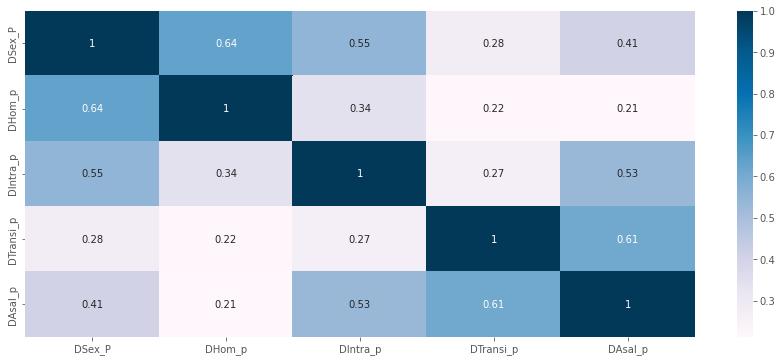

In [39]:
sns.heatmap(df2.corr(), annot = True, cmap = "PuBu")
plt.show()

In [40]:
scaler2 = StandardScaler()        # Cargando el escalador estandar
scaler2.fit(df2)                  # Calcula las medias y las desviaciones
X_scaled = scaler2.transform(df2) # Estandariza la data.
pd.DataFrame(X_scaled, index = df2.index, columns = df2.columns)

,DSex_P,DHom_p,DIntra_p,DTransi_p,DAsal_p
Departamento,,,,,
Antioquia,-0.663883,-0.196509,-0.199243,-0.104096,-0.361624
Atlantico,-0.239343,-0.508407,0.046727,-0.107368,-1.747823
Bogota_D.C.,0.281500,1.493371,1.195478,-1.285749,-1.503020
Bolivar,-0.113606,-0.790414,-0.509785,-0.693637,-0.379511
Boyaca,-0.268795,0.052035,0.833764,0.162437,0.750273
Caldas,-0.059184,-0.067750,-0.485429,0.771161,0.016557
Caqueta,-0.061174,-0.468669,-0.574400,-1.012212,-0.725149
Cauca,-0.795682,-0.365312,-0.414780,-0.370390,-0.439714
Cesar,0.339369,-0.399596,-0.094966,-0.049362,0.277503


In [41]:
## Realizamos la rutina habitual.
pca2 = PCA(n_components = 2) 
pca2.fit(X_scaled)
df2_pca = pca2.transform(X_scaled)
pca2_trans =  pd.DataFrame(df2_pca, index = df2.index, columns = ["PC1","PC2",])
pca2_trans.head()

,PC1,PC2
Departamento,,
Antioquia,0.712187,-0.151438
Atlantico,1.168391,0.511234
Bogota_D.C.,-0.086747,2.423493
Bolivar,1.062042,0.059052
Boyaca,-0.694155,-0.482570


In [42]:
print("Se ajustó un PCA a una data de tamaño:",df2.shape)
print("Se obtuvo un ajuste por PCA de tamaño:",pca2_trans.shape)
expl = pca2.explained_variance_ratio_
print("Cantidad de varianza explicada: {:.3f}%".format(sum(expl[0:2])*100))

Se ajustó un PCA a una data de tamaño: (33, 5)
Se obtuvo un ajuste por PCA de tamaño: (33, 2)
Cantidad de varianza explicada: 74.419%


In [43]:
## La correlación lineal debe ser 0.
pca2_trans.corr()

,PC1,PC2
PC1,1.000000e+00,7.966107e-18
PC2,7.966107e-18,1.000000e+00


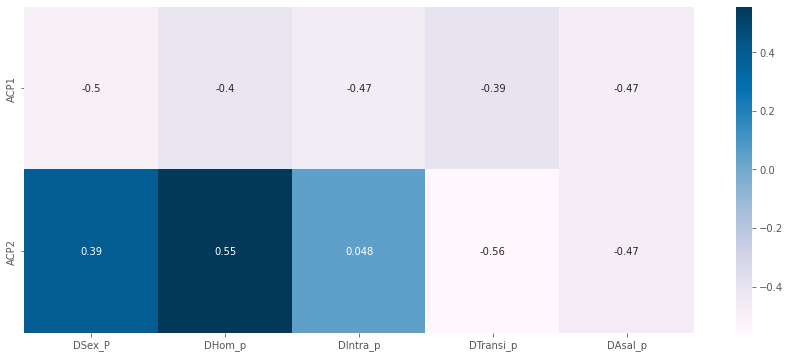

In [44]:
sns.heatmap(pca2.components_,xticklabels = df2.columns, yticklabels=["ACP1","ACP2"], 
            annot=True, cmap="PuBu")
plt.show()

In [53]:
fig = px.scatter(pca2_trans, x = "PC1", y = "PC2",text = pca2_trans.index, hover_name = pca2_trans.index, 
                 title = "Interpretación",)
fig.show()

In [46]:
df2.loc['San_Andres']

DSex_P        29.331871
DHom_p         5.101195
DIntra_p     300.970502
DTransi_p    137.732264
DAsal_p      629.997577
Name: San_Andres, dtype: float64

In [47]:
pd.DataFrame(df2.loc['San_Andres'])

,San_Andres
DSex_P,29.331871
DHom_p,5.101195
DIntra_p,300.970502
DTransi_p,137.732264
DAsal_p,629.997577


In [48]:
#comparando la media con la ciudad de san andres, se nota que que tiene
#valores mas extremos  por tal motivo esta mas hacia la izquierda en PC1
pd.DataFrame(df2.loc['San_Andres']).T

,DSex_P,DHom_p,DIntra_p,DTransi_p,DAsal_p
San_Andres,29.331871,5.101195,300.970502,137.732264,629.997577


In [49]:
df2.mean()

DSex_P        45.771800
DHom_p         7.032346
DIntra_p     139.703236
DTransi_p     81.814546
DAsal_p      223.587321
dtype: float64

In [50]:
#con respecto a la media, guainia tiene Mas homisidios y delitos sexuales que el 
#promedio
df2.loc['Guainia']

DSex_P        85.163191
DHom_p        39.129034
DIntra_p     135.800764
DTransi_p     64.447820
DAsal_p      202.550292
Name: Guainia, dtype: float64

In [51]:
df2.mean()

DSex_P        45.771800
DHom_p         7.032346
DIntra_p     139.703236
DTransi_p     81.814546
DAsal_p      223.587321
dtype: float64

In [56]:
#con respecto a la media, Bogota tiene Mas violencia intra familiar que el 
#promedio
pd.DataFrame(df2.loc['Bogota_D.C.'])

,Bogota_D.C.
DSex_P,51.472629
DHom_p,17.882797
DIntra_p,242.157269
DTransi_p,8.861946
DAsal_p,33.308695


In [57]:
df2.mean()

DSex_P        45.771800
DHom_p         7.032346
DIntra_p     139.703236
DTransi_p     81.814546
DAsal_p      223.587321
dtype: float64